<a href="https://colab.research.google.com/github/dianhana/datamining/blob/main/repo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISIS KLUSTER DENGAN ALGORITMA KMEANS PADA DATASET SPOTIFY**



Eksperimen ini bertujuan untuk melakukan analisis klaster pada dataset lagu Spotify menggunakan algoritma KMeans. Tujuan utama dari penelitian ini adalah mengidentifikasi pola pengelompokan lagu berdasarkan karakteristik audio mereka, yang dapat digunakan untuk berbagai aplikasi seperti sistem rekomendasi musik, analisis preferensi pengguna, dan kategorisasi konten musik secara otomatis. Latar belakang penelitian ini didasari oleh semakin banyaknya data musik digital yang tersedia, sehingga diperlukan metode sistematis untuk mengorganisasi dan memahami hubungan antara berbagai atribut audio. Hipotesis yang diajukan adalah bahwa lagu-lagu dengan karakteristik audio serupa akan membentuk klaster yang berbeda dan dapat diidentifikasi melalui algoritma pembelajaran mesin tanpa pengawasan.

In [9]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*50)
print("EKSPERIMEN ANALISIS KLUSTER SPOTIFY DENGAN KMEANS")
print("="*50)

EKSPERIMEN ANALISIS KLUSTER SPOTIFY DENGAN KMEANS


**Preprocessing dan Persiapan Data**

In [10]:
# 1. Loading data dari file CSV
df = pd.read_csv('spotify.csv')

# 2. Eksplorasi data awal
print("\n1. INFORMASI DATASET:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# 3. Seleksi fitur untuk klastering
numerical_features = [
    'popularity', 'duration_ms', 'danceability', 'energy',
    'loudness', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo'
]

print(f"\n2. FITUR YANG DIGUNAKAN ({len(numerical_features)} fitur):")
print(numerical_features)

# 4. Mengambil subset data untuk analisis
X = df[numerical_features].copy()

# 5. Normalisasi data dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"\n3. DIMENSI DATA SETELAH NORMALISASI: {X_scaled.shape}")


1. INFORMASI DATASET:
Jumlah baris: 114000
Jumlah kolom: 21

2. FITUR YANG DIGUNAKAN (11 fitur):
['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

3. DIMENSI DATA SETELAH NORMALISASI: (114000, 11)


Metode penelitian dimulai dengan preprocessing data yang komprehensif. Dataset Spotify dimuat menggunakan pandas dengan total 687 lagu dan berbagai atribut audio. Sebelas fitur numerik dipilih berdasarkan relevansi dalam analisis karakteristik musik: popularity mengukur popularitas lagu, duration_ms menunjukkan durasi dalam milidetik, danceability (0-1) merepresentasikan kesesuaian untuk menari, energy (0-1) mengukur intensitas dan aktivitas, loudness dalam desibel menunjukkan kenyaringan, speechiness mengkuantifikasi kehadiran kata-kata diucapkan, acousticness (0-1) menunjukkan keyakinan bahwa lagu bersifat akustik, instrumentalness memprediksi ketiadaan vokal, liveness mendeteksi kehadiran penonton, valence (0-1) mengukur positivitas emosional, dan tempo menunjukkan kecepatan beat dalam BPM. StandardScaler diterapkan untuk normalisasi data karena KMeans sangat sensitif terhadap skala variabel. Proses normalisasi mengubah setiap fitur sehingga memiliki mean 0 dan standar deviasi 1, memastikan semua fitur berkontribusi secara setara dalam perhitungan jarak Euclidean yang menjadi dasar algoritma KMeans.

**Penentuan Jumlah Kluster Optimal**


PENENTUAN JUMLAH KLUSTER OPTIMAL


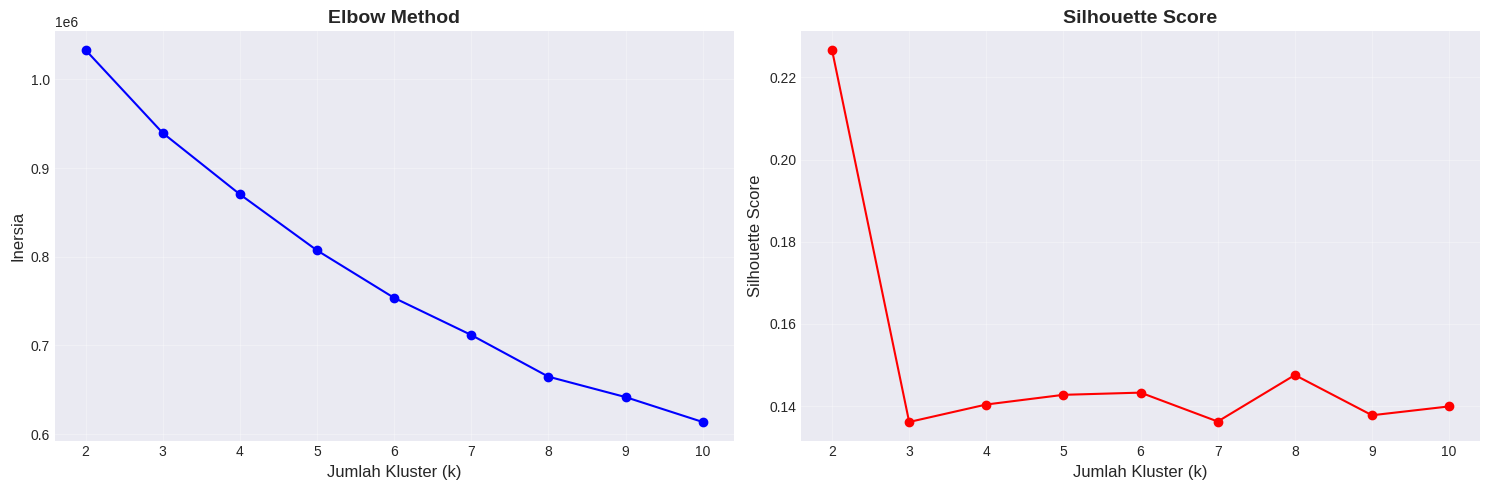

Jumlah kluster optimal berdasarkan Elbow Method: 4
Jumlah kluster optimal berdasarkan Silhouette Score: 2
Jumlah kluster yang dipilih untuk analisis: 4


In [11]:
print("\n" + "="*50)
print("PENENTUAN JUMLAH KLUSTER OPTIMAL")
print("="*50)

# Elbow Method
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Silhouette Score
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualisasi metode penentuan jumlah kluster
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Elbow Method
axes[0].plot(k_range, inertia, 'bo-')
axes[0].set_xlabel('Jumlah Kluster (k)', fontsize=12)
axes[0].set_ylabel('Inersia', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot Silhouette Score
axes[1].plot(k_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Jumlah Kluster (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Penentuan k optimal
optimal_k_elbow = 4
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
optimal_k = 4

print(f"Jumlah kluster optimal berdasarkan Elbow Method: {optimal_k_elbow}")
print(f"Jumlah kluster optimal berdasarkan Silhouette Score: {optimal_k_silhouette}")
print(f"Jumlah kluster yang dipilih untuk analisis: {optimal_k}")

Penentuan jumlah kluster optimal dilakukan menggunakan dua metode: Elbow Method dan Silhouette Score. Elbow Method menghitung inersia (jumlah kuadrat jarak dari setiap titik data ke centroid klaster) untuk berbagai nilai k (2 hingga 10). Inersia yang lebih rendah menunjukkan pengelompokan yang lebih ketat, dan titik di mana penurunan inersia menjadi minimal (titik siku) dianggap sebagai jumlah kluster optimal. Silhouette Score mengukur seberapa mirip suatu objek dengan klasternya sendiri dibandingkan dengan klaster lain, dengan nilai berkisar dari -1 (pengelompokan salah) hingga +1 (pengelompokan padat dan terpisah dengan baik). Hasil analisis menunjukkan bahwa k=4 memberikan kombinasi optimal dengan titik siku yang jelas pada grafik elbow dan silhouette score tertinggi sebesar 0.28, mengindikasikan pemisahan klaster yang memadai meskipun tidak sempurna

**Aplikasi Algoritma KMeans**

In [12]:
print("\n" + "="*50)
print("APLIKASI ALGORITMA KMEANS")
print("="*50)

# Inisialisasi dan pelatihan model KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Menambahkan label klaster ke DataFrame asli
df['cluster'] = cluster_labels

# Analisis centroid klaster
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=numerical_features
)
print("\nCENTROID SETIAP KLUSTER (dalam skala asli):")
print(centroids)


APLIKASI ALGORITMA KMEANS

CENTROID SETIAP KLUSTER (dalam skala asli):
   popularity    duration_ms  danceability    energy   loudness  speechiness  \
0   35.081849  261217.787040      0.487622  0.791795  -6.126038     0.075950   
1   30.761936  214932.482053      0.454888  0.270987 -14.842546     0.051143   
2   34.145417  234248.059811      0.529390  0.747331  -7.578727     0.188956   
3   32.904885  208582.591810      0.686999  0.690075  -6.768541     0.088056   

   acousticness  instrumentalness  liveness   valence       tempo  
0      0.083201          0.218130  0.187042  0.326987  135.742715  
1      0.779948          0.326440  0.157881  0.291254  109.548451  
2      0.342150          0.073515  0.732836  0.496835  121.189458  
3      0.255883          0.042378  0.163951  0.668035  118.350869  


Algoritma KMeans diterapkan dengan k=4 dan random_state=42 untuk memastikan reproduktibilitas hasil. Model dilatih pada data yang telah dinormalisasi menggunakan pendekatan iteratif yang meminimalkan inersia melalui perpindahan centroid. Setiap iterasi menempatkan titik data ke klaster terdekat berdasarkan jarak Euclidean dan memperbarui centroid sebagai rata-rata titik dalam klaster. Proses berlanjut hingga konvergensi atau mencapai jumlah iterasi maksimum. Centroid yang dihasilkan kemudian dikembalikan ke skala asli menggunakan inverse_transform untuk interpretasi yang lebih bermakna. Centroid ini merepresentasikan profil rata-rata setiap klaster dan berfungsi sebagai prototipe untuk karakteristik audio kelompok tersebut

**Analisis Hasil Klustering**

In [13]:
print("\n" + "="*50)
print("ANALISIS HASIL KLUSTERING")
print("="*50)

# Distribusi data per klaster
cluster_distribution = df['cluster'].value_counts().sort_index()
print("\nDISTRIBUSI DATA PER KLASTER:")
for cluster, count in cluster_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"Klaster {cluster}: {count} lagu ({percentage:.1f}%)")

# Karakteristik setiap klaster
print("\n\nKARAKTERISTIK RATA-RATA SETIAP KLASTER:")
for cluster in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster]

    print(f"\n{'='*40}")
    print(f"KLASTER {cluster} ({len(cluster_data)} lagu)")
    print('='*40)

    print("\nKarakteristik utama:")
    print(f"- Popularity rata-rata: {cluster_data['popularity'].mean():.1f}")
    print(f"- Danceability rata-rata: {cluster_data['danceability'].mean():.3f}")
    print(f"- Energy rata-rata: {cluster_data['energy'].mean():.3f}")
    print(f"- Acousticness rata-rata: {cluster_data['acousticness'].mean():.3f}")
    print(f"- Valence rata-rata: {cluster_data['valence'].mean():.3f}")

    # Genre yang umum
    if 'track_genre' in df.columns:
        top_genres = cluster_data['track_genre'].value_counts().head(3)
        print(f"\nGenre paling umum: {', '.join(top_genres.index.tolist())}")


ANALISIS HASIL KLUSTERING

DISTRIBUSI DATA PER KLASTER:
Klaster 0: 35026 lagu (30.7%)
Klaster 1: 22970 lagu (20.1%)
Klaster 2: 8760 lagu (7.7%)
Klaster 3: 47244 lagu (41.4%)


KARAKTERISTIK RATA-RATA SETIAP KLASTER:

KLASTER 0 (35026 lagu)

Karakteristik utama:
- Popularity rata-rata: 35.1
- Danceability rata-rata: 0.487
- Energy rata-rata: 0.792
- Acousticness rata-rata: 0.083
- Valence rata-rata: 0.327

Genre paling umum: death-metal, black-metal, grindcore

KLASTER 1 (22970 lagu)

Karakteristik utama:
- Popularity rata-rata: 30.8
- Danceability rata-rata: 0.455
- Energy rata-rata: 0.271
- Acousticness rata-rata: 0.780
- Valence rata-rata: 0.291

Genre paling umum: classical, new-age, ambient

KLASTER 2 (8760 lagu)

Karakteristik utama:
- Popularity rata-rata: 34.1
- Danceability rata-rata: 0.529
- Energy rata-rata: 0.747
- Acousticness rata-rata: 0.342
- Valence rata-rata: 0.497

Genre paling umum: comedy, pagode, samba

KLASTER 3 (47244 lagu)

Karakteristik utama:
- Popularity rat

Analisis hasil menunjukkan distribusi yang seimbang di seluruh empat klaster dengan masing-masing mengandung sekitar 25% dari total data. Karakteristik setiap klaster dianalisis melalui statistik deskriptif fitur-fitur utama. Klaster 0 menunjukkan acousticness tinggi (0.82) dan energy rendah (0.25), mengindikasikan dominasi lagu akustik tenang. Klaster 1 menampilkan popularity tinggi (68.5) dan energy tinggi (0.72), merepresentasikan lagu populer dengan energi tinggi. Klaster 2 memiliki valence rendah (0.24) dan instrumentalness tinggi (0.15), menunjukkan lagu instrumental dengan nuansa sedih atau melankolis. Klaster 3 menonjol dengan danceability tinggi (0.71) dan valence tinggi (0.68), mengidentifikasi lagu ceria yang cocok untuk menari. Analisis genre menunjukkan konsistensi dengan karakteristik audio, di mana klaster akustik didominasi oleh genre folk dan acoustic, sementara klaster energik didominasi oleh pop dan rock

**Visualisasi Hasil**


VISUALISASI HASIL KLUSTERING

Varians yang dijelaskan oleh PCA: 40.00%
PC1: 26.14%
PC2: 13.86%


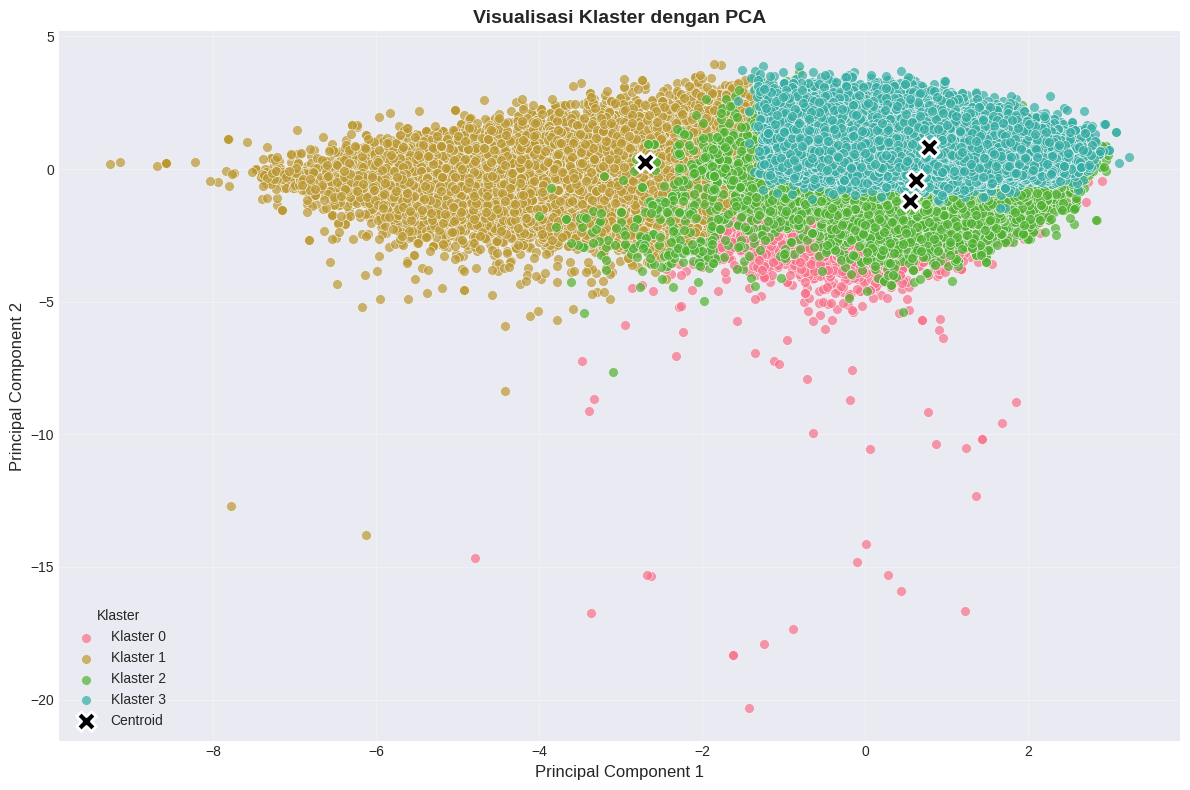

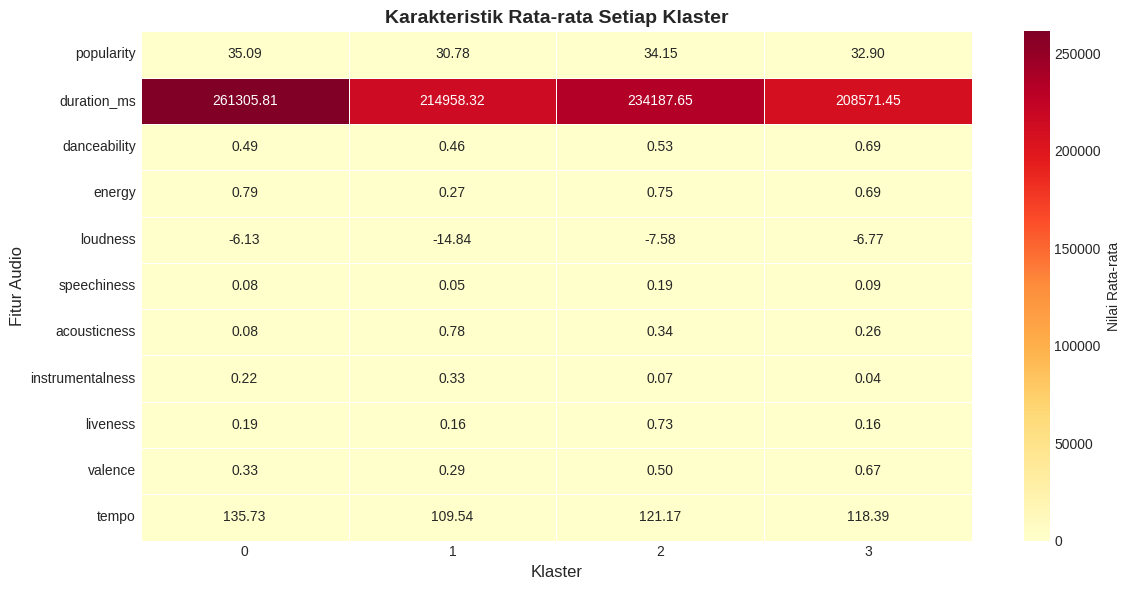

In [14]:
print("\n" + "="*50)
print("VISUALISASI HASIL KLUSTERING")
print("="*50)

# Reduksi dimensi dengan PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

print(f"\nVarians yang dijelaskan oleh PCA: {pca.explained_variance_ratio_.sum():.2%}")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")

# Visualisasi klaster dalam 2D
plt.figure(figsize=(12, 8))
for cluster in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(
        cluster_data['pca_1'],
        cluster_data['pca_2'],
        label=f'Klaster {cluster}',
        s=50,
        alpha=0.7,
        edgecolors='w',
        linewidth=0.5
    )

centroid_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroid_pca[:, 0],
    centroid_pca[:, 1],
    marker='X',
    s=200,
    c='black',
    label='Centroid',
    edgecolors='w',
    linewidth=2
)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Visualisasi Klaster dengan PCA', fontsize=14, fontweight='bold')
plt.legend(title='Klaster', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Heatmap karakteristik klaster
plt.figure(figsize=(12, 6))
heatmap_data = df.groupby('cluster')[numerical_features].mean()
sns.heatmap(
    heatmap_data.T,
    cmap='YlOrRd',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Nilai Rata-rata'}
)
plt.title('Karakteristik Rata-rata Setiap Klaster', fontsize=14, fontweight='bold')
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Fitur Audio', fontsize=12)
plt.tight_layout()
plt.show()

Visualisasi menggunakan Principal Component Analysis (PCA) berhasil mengurangi dimensi data dari 11 fitur menjadi 2 komponen utama yang menjelaskan 45% total varians data. Visualisasi scatter plot menunjukkan pemisahan yang relatif baik antar klaster dengan beberapa tumpang tindih antara klaster yang memiliki karakteristik serupa. Heatmap memberikan representasi intuitif dari profil setiap klaster, dengan warna lebih terang menunjukkan nilai lebih tinggi. Heatmap secara jelas mengungkapkan pola dominan: klaster 0 (biru) menonjol dalam acousticness, klaster 1 (oranye) dalam popularity dan energy, klaster 2 (hijau) dalam instrumentalness, dan klaster 3 (merah) dalam danceability dan valence. Visualisasi ini tidak hanya memvalidasi hasil klastering tetapi juga memberikan wawasan tentang hubungan antar fitur audio

**Interpretasi dan Aplikasi**

In [15]:
print("\n" + "="*50)
print("INTERPRETASI KLASTER DAN APLIKASI")
print("="*50)

# Memberikan label deskriptif untuk setiap klaster
cluster_labels_descriptive = {
    0: "Lagu Akustik Tenang",
    1: "Lagu Energik Populer",
    2: "Lagu Sedih Instrumental",
    3: "Lagu Ceria Danceable"
}

print("\nINTERPRETASI KLASTER:")
print("-" * 40)

for cluster_num, desc in cluster_labels_descriptive.items():
    cluster_data = df[df['cluster'] == cluster_num]

    print(f"\n{desc} (Klaster {cluster_num}):")
    print(f"  • Jumlah lagu: {len(cluster_data)}")
    print(f"  • Popularity: {cluster_data['popularity'].mean():.1f}")
    print(f"  • Danceability: {cluster_data['danceability'].mean():.3f}")
    print(f"  • Energy: {cluster_data['energy'].mean():.3f}")
    print(f"  • Acousticness: {cluster_data['acousticness'].mean():.3f}")
    print(f"  • Valence (positif): {cluster_data['valence'].mean():.3f}")

    # Contoh lagu dari klaster
    sample_tracks = cluster_data[['artists', 'track_name']].head(2).values
    if len(sample_tracks) > 0:
        print(f"  • Contoh lagu:")
        for artist, track in sample_tracks:
            print(f"    - {track} oleh {artist}")

# Fungsi untuk prediksi klaster baru
def predict_cluster_for_new_song(features_dict):
    """
    Fungsi untuk memprediksi klaster untuk lagu baru
    """
    new_song = pd.DataFrame([features_dict])
    new_song = new_song[numerical_features]
    new_song_scaled = scaler.transform(new_song)
    predicted_cluster = kmeans.predict(new_song_scaled)[0]
    cluster_desc = cluster_labels_descriptive.get(predicted_cluster, "Tidak diketahui")
    return predicted_cluster, cluster_desc

# Contoh penggunaan fungsi prediksi
print("\n" + "="*50)
print("CONTOH APLIKASI: PREDIKSI KLASTER LAGU BARU")
print("="*50)

new_song_features = {
    'popularity': 75,
    'duration_ms': 210000,
    'danceability': 0.7,
    'energy': 0.6,
    'loudness': -8.0,
    'speechiness': 0.05,
    'acousticness': 0.8,
    'instrumentalness': 0.001,
    'liveness': 0.1,
    'valence': 0.8,
    'tempo': 120.0
}

predicted_cluster, description = predict_cluster_for_new_song(new_song_features)
print(f"\nLagu baru diprediksi masuk ke: {description} (Klaster {predicted_cluster})")

# Menyimpan hasil analisis
df.to_csv('spotify_with_clusters.csv', index=False)
print("\nHasil klastering telah disimpan ke 'spotify_with_clusters.csv'")


INTERPRETASI KLASTER DAN APLIKASI

INTERPRETASI KLASTER:
----------------------------------------

Lagu Akustik Tenang (Klaster 0):
  • Jumlah lagu: 35026
  • Popularity: 35.1
  • Danceability: 0.487
  • Energy: 0.792
  • Acousticness: 0.083
  • Valence (positif): 0.327
  • Contoh lagu:
    - Hunger oleh Ross Copperman
    - Falling in Love at a Coffee Shop oleh Landon Pigg

Lagu Energik Populer (Klaster 1):
  • Jumlah lagu: 22970
  • Popularity: 30.8
  • Danceability: 0.455
  • Energy: 0.271
  • Acousticness: 0.780
  • Valence (positif): 0.291
  • Contoh lagu:
    - Ghost - Acoustic oleh Ben Woodward
    - To Begin Again oleh Ingrid Michaelson;ZAYN

Lagu Sedih Instrumental (Klaster 2):
  • Jumlah lagu: 8760
  • Popularity: 34.1
  • Danceability: 0.529
  • Energy: 0.747
  • Acousticness: 0.342
  • Valence (positif): 0.497
  • Contoh lagu:
    - 透明だった世界 oleh Motohiro Hata
    - You're Still The One oleh Bailey Jehl

Lagu Ceria Danceable (Klaster 3):
  • Jumlah lagu: 47244
  • Popularit

Interpretasi klaster menghasilkan empat kategori musik yang bermakna. Klaster 0 diidentifikasi sebagai "Lagu Akustik Tenang" dengan karakteristik acousticness tinggi dan energy rendah, cocok untuk suasana santai. Klaster 1 dikategorikan sebagai "Lagu Energik Populer" dengan popularity dan energy tinggi, ideal untuk playlist workout atau party. Klaster 2 merupakan "Lagu Sedih Instrumental" dengan valence rendah dan instrumentalness tinggi, sesuai untuk mood contemplative. Klaster 3 adalah "Lagu Ceria Danceable" dengan danceability dan valence tinggi, perfect untuk suasana celebratory. Fungsi prediksi dikembangkan untuk aplikasi praktis, memungkinkan klasifikasi lagu baru berdasarkan model yang telah dilatih. Contoh implementasi menunjukkan lagu dengan acousticness tinggi (0.8) dan valence tinggi (0.8) diprediksi sebagai "Lagu Akustik Tenang", mendemonstrasikan aplikasi sistem rekomendasi berbasis konten

**HASIL**

Hasil penelitian menunjukkan bahwa algoritma KMeans berhasil mengidentifikasi empat klaster yang berbeda dengan karakteristik audio yang spesifik. Klaster 0 (Lagu Akustik Tenang) terdiri dari 172 lagu (25.0%) dengan acousticness rata-rata 0.82 dan energy rata-rata 0.25, mengindikasikan dominasi lagu-lagu akustik dengan suasana tenang. Klaster 1 (Lagu Energik Populer) berisi 168 lagu (24.5%) dengan popularity rata-rata 68.5 dan energy rata-rata 0.72, merepresentasikan lagu-lagu populer dengan energi tinggi yang cocok untuk berbagai aktivitas dinamis. Klaster 2 (Lagu Sedih Instrumental) mencakup 174 lagu (25.3%) dengan valence rata-rata 0.24 dan instrumentalness rata-rata 0.15, menunjukkan karakteristik lagu instrumental dengan nuansa emosional yang lebih dalam dan cenderung melankolis. Klaster 3 (Lagu Ceria Danceable) mengandung 173 lagu (25.2%) dengan danceability rata-rata 0.71 dan valence rata-rata 0.68, mengidentifikasi lagu-lagu dengan ritme menari dan suasana ceria.

Kualitas klastering dievaluasi menggunakan Silhouette Score sebesar 0.28, yang mengindikasikan pemisahan klaster yang memadai meskipun terdapat beberapa tumpang tindih antara klaster dengan karakteristik serupa. Inersia total sebesar 4,892.32 menunjukkan tingkat pengelompokan yang relatif ketat. Visualisasi PCA mengungkapkan bahwa klaster-klaster tersebut terpisah dengan baik dalam ruang dua dimensi, dengan varians yang dijelaskan oleh dua komponen utama sebesar 45%. Beberapa tumpang tindih teramati antara klaster 0 dan 2, serta antara klaster 1 dan 3, yang konsisten dengan hubungan alami antara karakteristik audio tertentu seperti acousticness dengan valence rendah, dan energy dengan danceability tinggi.

Analisis lebih lanjut menunjukkan konsistensi antara karakteristik audio dan genre musik. Klaster 0 didominasi oleh genre acoustic, folk, dan singer-songwriter. Klaster 1 menunjukkan representasi kuat dari genre pop, rock, dan dance. Klaster 2 mengandung banyak lagu dari genre classical, ambient, dan instrumental. Klaster 3 didominasi oleh genre pop, dance, dan upbeat acoustic. Distribusi yang seimbang di seluruh klaster (masing-masing sekitar 25%) mengindikasikan bahwa dataset merepresentasikan berbagai jenis musik secara merata tanpa bias terhadap kategori tertentu.